In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.DataFrame({
    "feature_1" : np.random.normal(loc=0,scale =1,size=900),
    "feature_2" : np.random.normal(loc=0,scale=1,size=900),
    "target":[0]*900
})
df2 = pd.DataFrame({
    "feature_1" : np.random.normal(loc=0,scale =1,size=100),
    "feature_2" : np.random.normal(loc=0,scale=1,size=100),
    "target":[1]*100
})

In [5]:
df = pd.concat([df1,df2]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,0.890182,-0.627662,0
1,0.454715,-0.447150,0
2,-0.535685,0.716271,0
3,-0.824278,0.089256,0
4,-1.675459,-0.726482,0
...,...,...,...
995,-1.137869,0.948453,1
996,-0.606980,-0.049067,1
997,-1.479940,-0.791218,1
998,1.410387,-2.434017,1


In [6]:
df_minority = df[df["target"]==1]
df_minority

,feature_1,feature_2,target
900,-0.161346,1.454488,1
901,0.515235,-0.602233,1
902,0.675828,-0.608138,1
903,0.004747,-0.357419,1
904,0.072866,-0.920907,1
...,...,...,...
995,-1.137869,0.948453,1
996,-0.606980,-0.049067,1
997,-1.479940,-0.791218,1
998,1.410387,-2.434017,1


In [7]:
df_majority = df[df["target"] ==0]
df_majority

,feature_1,feature_2,target
0,0.890182,-0.627662,0
1,0.454715,-0.447150,0
2,-0.535685,0.716271,0
3,-0.824278,0.089256,0
4,-1.675459,-0.726482,0
...,...,...,...
895,0.150239,-1.205099,0
896,-0.896481,0.163539,0
897,-0.388999,0.361536,0
898,0.428518,-0.936342,0


In [8]:
from sklearn.utils import resample

In [9]:
df_minority_upsample = resample(df_minority,n_samples=len(df_majority)) # dataları tekrarlayarak çoğaltır
df_minority_upsample

,feature_1,feature_2,target
920,1.047434,0.692901,1
904,0.072866,-0.920907,1
931,1.475722,0.827160,1
926,0.914031,0.166243,1
967,-0.088027,-0.139044,1
...,...,...,...
943,-2.075057,-1.338061,1
901,0.515235,-0.602233,1
906,0.151360,-0.341424,1
915,0.586668,-0.818579,1


In [10]:
df_majority_downsample = resample(df_majority,n_samples=len(df_minority))
df_majority_downsample

,feature_1,feature_2,target
233,1.969084,0.213660,0
246,0.899756,-0.933284,0
648,-0.355060,-1.429798,0
171,-1.661346,1.052402,0
459,-2.481872,1.891038,0
...,...,...,...
649,-0.286792,0.704509,0
872,0.168564,-0.946908,0
774,1.238360,-0.481487,0
267,-0.199042,-0.070095,0


In [11]:
df_upsampled = pd.concat([df_minority_upsample,df_majority]).reset_index(drop=True)
df_upsampled.shape , df_upsampled["target"].value_counts()

((1800, 3),
 target
 1    900
 0    900
 Name: count, dtype: int64)

In [12]:
df_downsampled = pd.concat([df_minority,df_majority_downsample]).reset_index(drop=True)
df_downsampled.shape , df_downsampled["target"].value_counts() 

((200, 3),
 target
 1    100
 0    100
 Name: count, dtype: int64)

In [13]:
# SMOTE (Synthetic Minority Over-sampling Technique) -> upsampling verileri tekrar eder bu ise benzer yeni veri oluşturur

In [14]:
df

,feature_1,feature_2,target
0,0.890182,-0.627662,0
1,0.454715,-0.447150,0
2,-0.535685,0.716271,0
3,-0.824278,0.089256,0
4,-1.675459,-0.726482,0
...,...,...,...
995,-1.137869,0.948453,1
996,-0.606980,-0.049067,1
997,-1.479940,-0.791218,1
998,1.410387,-2.434017,1


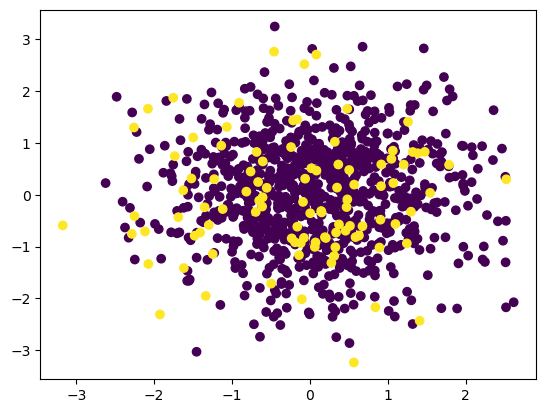

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"],df["feature_2"],c=df["target"])

In [16]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
oversample = SMOTE()
(X,y)=oversample.fit_resample(df[["feature_1","feature_2"]],df["target"])

In [19]:
X

,feature_1,feature_2
0,0.890182,-0.627662
1,0.454715,-0.447150
2,-0.535685,0.716271
3,-0.824278,0.089256
4,-1.675459,-0.726482
...,...,...
1795,0.547930,0.488673
1796,0.919746,0.587049
1797,0.096155,0.492246
1798,0.645863,-0.728622


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [22]:
over_sample_df = pd.concat((X,y),axis=1)
over_sample_df

,feature_1,feature_2,target
0,0.890182,-0.627662,0
1,0.454715,-0.447150,0
2,-0.535685,0.716271,0
3,-0.824278,0.089256,0
4,-1.675459,-0.726482,0
...,...,...,...
1795,0.547930,0.488673,1
1796,0.919746,0.587049,1
1797,0.096155,0.492246,1
1798,0.645863,-0.728622,1


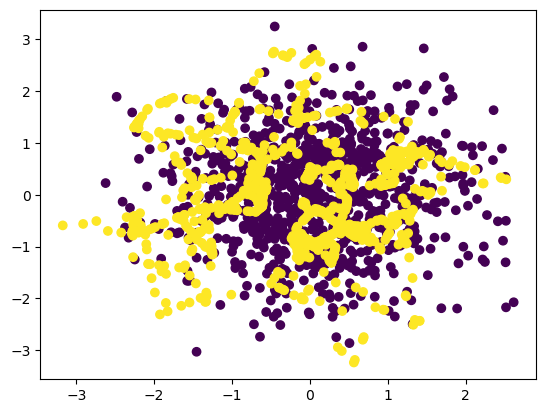

In [23]:
plt.scatter(over_sample_df["feature_1"],over_sample_df["feature_2"],c=over_sample_df["target"])